In [1]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import calendar
import numpy as np

In [3]:
with open('../data_analysis/map_reduce_month.json', 'r') as f:
    map_reduce_by_month = json.load(f)
with open('../data_analysis/map_reduce_total.json', 'r') as f:
    map_reduce_total = json.load(f)

In [29]:
exclude = ["Is","As","The","Of","", "To","In","And",
           "Will","Was","Be","It","Its"
           "A","That","On","From","Said","Are", "With",
           "An","At","Also","For","One","Two", "They",
           "Not", "Been","Has","Have","Up","By","Can",
           "I","You","We","They","She","He","Them", "His","Her",
           "Your","Yours","Were","Its"
           "Hundred","Thousand","Million","Trillion",
           "Jan","Feb","Aug","Dec","400","Since","After","Before","Say",
           "Added","Near","Far","A","An","U"]

map_together = {"Russian":"Russia","Russias":"Russia",
                "Ukrainian":"Ukraine","Ukraines":"Ukraine"}

In [46]:
def clean(dataframe):
    return dataframe[~dataframe['word'].isin(exclude)]
def get_months(date_string):
    return calendar.month_name[int(date_string[4:6])]

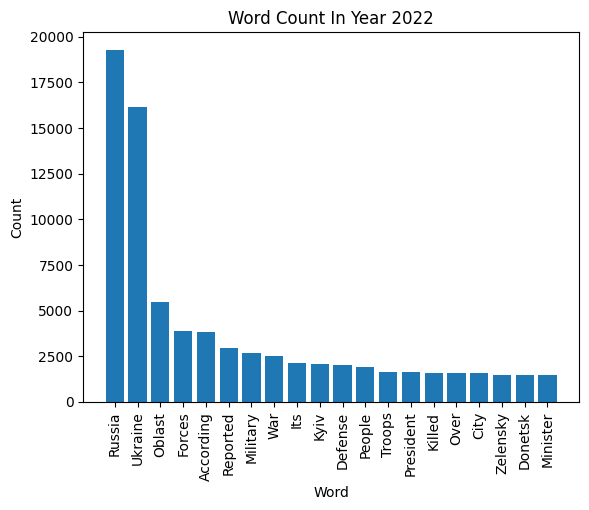

In [30]:
total_df = pd.DataFrame([{'word': d['word'], 'count': d['count']} for d in map_reduce_total])
total_df_filtered = clean(total_df)
for key,value in map_together.items():
    total_df_filtered = total_df_filtered.replace(key,value)

total_df_filtered = total_df_filtered.groupby('word').sum().reset_index()

top_20_total_df = total_df_filtered.sort_values('count',ascending=False).head(20)
plt.bar(top_20_total_df['word'], top_20_total_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Count In Year 2022')
plt.show()

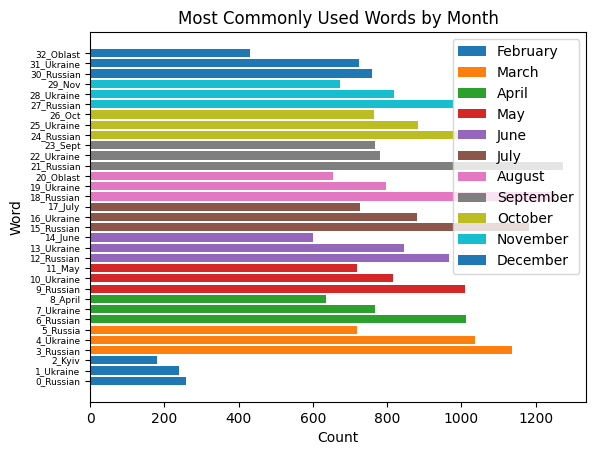

In [47]:
month_df = pd.DataFrame([{'word': d['word'], 'date':d['date'], 'count': d['count']} for d in map_reduce_by_month])
month_df_filtered = clean(month_df)

top_words = month_df_filtered.groupby('date').\
    apply(lambda x: x.sort_values('count', ascending=False).head(3))

top_words = top_words.reset_index(drop=True)
top_words['date']=top_words['date'].apply(lambda x: get_months(x))

dates = top_words['date'].unique()
fig, ax = plt.subplots()

i=0
for date in dates:
    monthly_data = top_words[top_words['date'] == date]
    words = monthly_data['word'].tolist()
    """Sadly Unique is enforced with label grouping, so this is the only fix"""
    words = [f"{i+j}_{words[j]}" for j in range(len(words))]
    i+=3
    ax.barh(words, monthly_data['count'], label=date)

ax.set_xlabel('Count')
ax.set_ylabel('Word')
ax.set_title('Most Commonly Used Words by Month')
ax.legend()
plt.yticks(fontsize=6.5)
plt.show()

In [50]:
day_df = pd.DataFrame([{'word': d['word'], 'date':d['date'], 'count': d['count']} for d in map_reduce_by_month])
day_df_filtered = clean(day_df)
idx  = day_df_filtered.groupby('date')['count'].idxmax()
day_df_filtered = day_df_filtered.loc[idx]
day_df_filtered = day_df_filtered.set_index('date')
day_df_filtered = day_df_filtered.drop('count',axis=1)
day_df_filtered.head()

,word
date,
202202,Russian
202203,Russian
202204,Russian
202205,Russian
202206,Russian
